In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [ ]:
data1=pd.read_excel('1not0.xlsx')
data1.head

<bound method NDFrame.head of                                                    text  Label
0     وين كان عقلي يوم سجلت رقمي ليدر بكل المواد؟ \n...      0
1     @alialkhalede مرات أگول خلي انتحر وفتك بس أفكر...      0
2     افكر انتحر ببث مباشر لكن محتار \nبث مباشر فيس ...      1
3     لم اجي اشتكيلك من سلبياتي عشان تعباني .. يا ته...      1
4     @Tulip_rose2 @Be_Cool68 🤔 يعني .. جني تسرعت \n...      0
...                                                 ...    ...
5714  @Dr_Alchemist1 الفتره دى تحديدا احساسى بالغربه...      1
5715    @k_asiri4 🤣🤣🤣🤣 وإذا كان كل يوم وجها لوجة  انتحر      0
5716   @alshmaly999 مااردك انت انتحر الاول وانا وراك🤣🤣🤣      1
5717    @22334455zzz شغلة الدكتور الى قتلوه وصاحو انتحر      0
5718  @Amarin123456 لكن الملحدون طوابير على مشانق ال...      0

[5719 rows x 2 columns]>

In [ ]:
data1=data1.dropna()
data1=data1.reset_index(drop=True)
x=data1.iloc[:,0]
y=data1.iloc[:,1]
X=x.to_dict()


X=[]
for d in range(len(x)):
    b=x[d].lower()
    X.append(b)

trainDFx = X
trainDFy = y

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(trainDFx, trainDFy, test_size = 0.30, random_state = 101)

In [ ]:
print(train_x)

['@07oud @see7__u @_icloude ابي عدسات عسليه بحت يعني يبين لونها \nوما اكون زي القطوه😩😢\nاقترحي لي من ديفا ترا اموت فيها \nجربت توفي بس ابي اغير', 'اكره اشوف نفسي بالزعل ذا', '@aaaaaaa52 انا عايزه انتحر بجد مش كلام🙂', '@eduksa3 @kingsalman انا عندي رسالة حلم حياتي انكم انتوا تتابعوني، مابي اموت ابي الناس تعرف مين منال البطلة منال القوية  انا فخوره في نفسي انا من ذوي الاعاقة و اتمنى تتحققون حلمي و ما ابي\nانا مصوره و مصصمة مونتاج\n امنيتي انكم تتابعوني و ربي يسعدكم دنيا و آخرة و دايما بدعيلكم في صلاتي💔😢', 'انا عايزه اموت نفسي', '@astroforarabs دائما اسمي نفسي ابنة الصباح / برج الحوت طالع الحمل \nاكره ان اسهر و اعصب وحاليا داكتب واني عندي مشاعر لوم لان سهرانه و نومي انقلب هالفترة 🥺', 'اكره الناس السلبيه علطول اطلعهم برا حياتي ما اتفاهم معهم لانهم نكديين ويغثون💋', 'اكره يوم الوم نفسي', 'سته محادثات اضحك فيها وانا بالحقيقة ابي اختفي من كل مكان', 'هل أنا مع أسرائيل=هل أنت معتوه؟ أنا أكره الكيان المحتل\nأنا مع الحق الذى جاء من عند ربى الله\nبدون تعصب وبدون حماقات تأخذنى إلى الهاوية وبدون أن أ

In [ ]:
#encoding to chang y from sting
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return classification_report(predictions, valid_y)

SVM

In [ ]:
acc=[]
names=[]

In [ ]:
from sklearn.model_selection import GridSearchCV
model1=SVC()
# defining parameter range
param_grid = {
              #'C': [1, 10],
              'C': [10],
              #'kernel': ['linear', 'rbf'],
              'kernel': ['rbf'],
              'class_weight': ['balanced'],
              'gamma': [0.1, 1],
              'probability': [True]
              }



SVM+BOW

In [ ]:
# create a count vectorizer object
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDFx)
b= count_vect.fit(trainDFx)
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
print(b)

@amarin123456 لكن الملحدون طوابير على مشانق الانتحار  ، فكل ما انتحر ملحد تبعه الذي يليه 😅


In [ ]:
#####
#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer()
#X_counts = count_vect.fit_transform("trainDFx")
#CountVec_tokens=count_vect.get_feature_names()

#df_Countvect = pd.DataFrame(data = X_counts.toarray(),index = ['Doc1','Doc2'],columns = CountVec_tokens)
#print("\nCount Vectorizer\n")
#print(df_Countvect)

ValueError: ignored

In [ ]:
model1 = SVC()
model1.fit(xtrain_count, train_y)

# print prediction results
predictions = model1.predict(xvalid_count)
print(classification_report(valid_y, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1302
           1       0.73      0.51      0.60       414

    accuracy                           0.84      1716
   macro avg       0.79      0.73      0.75      1716
weighted avg       0.83      0.84      0.83      1716



In [ ]:
grid1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid1.fit(xtrain_count, train_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.825 total time=  21.8s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.854 total time=  23.3s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.836 total time=  42.5s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.845 total time=  27.9s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.841 total time=  14.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.785 total time=  13.1s
[CV 2/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.796 total time=  13.1s
[CV 3/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.784 total time=  13.6s
[CV 4/5] END C=10, class_w

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 1], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid1.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

grid_predictions1 = grid1.predict(xvalid_count)

# print classification report
print(classification_report(valid_y, grid_predictions1))

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=10, class_weight='balanced', gamma=0.1, probability=True)
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1302
           1       0.76      0.61      0.68       414

    accuracy                           0.86      1716
   macro avg       0.82      0.78      0.79      1716
weighted avg       0.85      0.86      0.85      1716



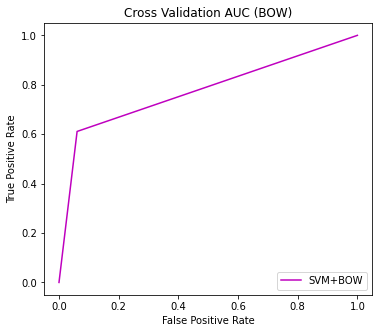

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns



SVM +  word level tf-idf


In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=50000)
tfidf_vect.fit(trainDFx)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
model1 = SVC()
model1.fit(xtrain_tfidf, train_y)

# print prediction results
predictions12 = model1.predict(xvalid_tfidf)
print(classification_report(valid_y, predictions12))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1302
           1       0.94      0.43      0.59       414

    accuracy                           0.86      1716
   macro avg       0.89      0.71      0.75      1716
weighted avg       0.87      0.86      0.83      1716



In [ ]:
grid12 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid12.fit(xtrain_tfidf, train_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.848 total time=  11.5s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.871 total time=  11.4s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.828 total time=  11.4s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.840 total time=  12.1s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.858 total time=  11.7s
[CV 1/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.848 total time=  28.8s
[CV 2/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.855 total time=  28.6s
[CV 3/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.843 total time=  19.2s
[CV 4/5] END C=10, class_w

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 1], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid12.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid12.best_estimator_)

grid_predictions12 = grid12.predict(xvalid_tfidf)

# print classification report
print(classification_report(valid_y, grid_predictions12))

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=10, class_weight='balanced', gamma=0.1, probability=True)
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1302
           1       0.75      0.64      0.69       414

    accuracy                           0.86      1716
   macro avg       0.82      0.78      0.80      1716
weighted avg       0.85      0.86      0.86      1716



SVM+ ngram level ngram_range=(2,3)

In [ ]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=500000)
tfidf_vect_ngram.fit(trainDFx)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [ ]:
model1 = SVC()
model1.fit(xtrain_tfidf_ngram, train_y)

# print prediction results
predictions13 = model1.predict(xvalid_tfidf_ngram)
print(classification_report(valid_y, predictions13))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1302
           1       0.97      0.15      0.26       414

    accuracy                           0.79      1716
   macro avg       0.88      0.57      0.57      1716
weighted avg       0.83      0.79      0.73      1716



In [ ]:
grid13 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid13.fit(xtrain_tfidf_ngram, train_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.824 total time=  25.1s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.826 total time=  33.9s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.809 total time=  33.5s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.804 total time=  22.4s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.816 total time=  20.0s
[CV 1/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.797 total time=  18.5s
[CV 2/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.796 total time=  19.1s
[CV 3/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.786 total time=  33.8s
[CV 4/5] END C=10, class_w

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 1], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid13.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid13.best_estimator_)

grid_predictions13 = grid13.predict(xvalid_tfidf_ngram)

# print classification report
print(classification_report(valid_y, grid_predictions13))

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=10, class_weight='balanced', gamma=0.1, probability=True)
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1302
           1       0.90      0.42      0.57       414

    accuracy                           0.85      1716
   macro avg       0.87      0.70      0.74      1716
weighted avg       0.86      0.85      0.83      1716



characters level tf-idf

In [ ]:
#7
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=50000)
tfidf_vect_ngram_chars.fit(trainDFx)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

print("------------")
model1 = SVC()
model1.fit(xtrain_tfidf_ngram_chars, train_y)

# print prediction results
predictions = model1.predict(xvalid_tfidf_ngram_chars)
print(classification_report(valid_y, predictions))

print("----------")
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(xtrain_tfidf_ngram_chars, train_y)


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:558: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1302
           1       0.86      0.46      0.60       414

    accuracy                           0.85      1716
   macro avg       0.86      0.72      0.75      1716
weighted avg       0.85      0.85      0.83      1716

----------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.843 total time=  49.6s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.830 total time=  46.8s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.835 total time= 1.1min
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.846 total time=  55.8s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.854 total time= 1.0min
[CV 1/5] END C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 1], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=3)

In [ ]:
#8
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions14 = grid.predict(xvalid_tfidf_ngram_chars)

# print classification report
print(classification_report(valid_y, grid_predictions14))

{'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf', 'probability': True}
SVC(C=10, class_weight='balanced', gamma=1, probability=True)
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1302
           1       0.82      0.56      0.66       414

    accuracy                           0.86      1716
   macro avg       0.85      0.76      0.79      1716
weighted avg       0.86      0.86      0.85      1716



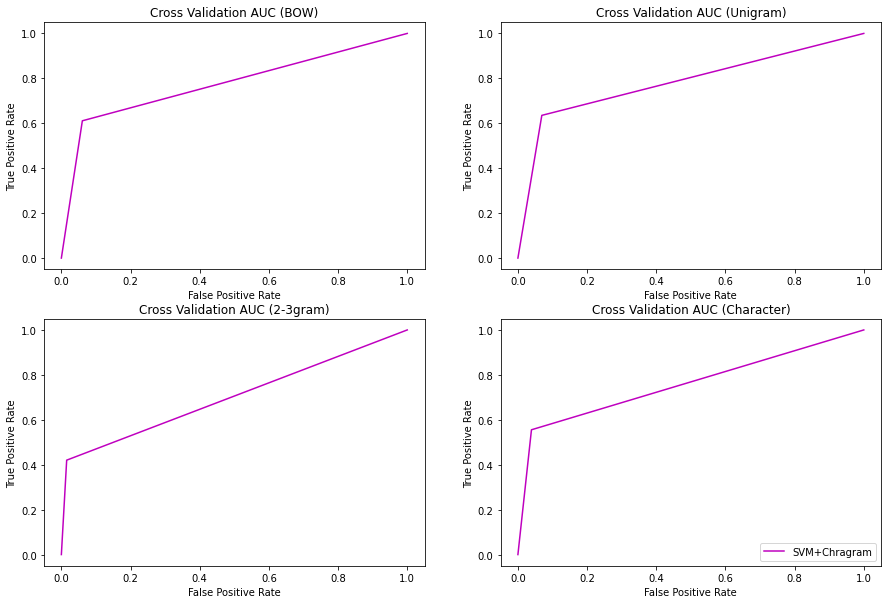

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#plt.subplots(figsize=(15, 5))
accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)

#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')

#####################################
accuracy12 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)

#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)

#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (Character)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import gensim
import nltk
import re
from sklearn.model_selection import train_test_split

data2 = pd.read_csv('1not0csv.csv')
#data=pd.read_excel (r'cleanDatasets1not0withoutDublication.xlsx')
data2.head()

,text,Label
0,وين كان عقلي يوم سجلت رقمي ليدر بكل المواد؟ \n...,0
1,@alialkhalede مرات أگول خلي انتحر وفتك بس أفكر...,0
2,افكر انتحر ببث مباشر لكن محتار \nبث مباشر فيس ...,1
3,لم اجي اشتكيلك من سلبياتي عشان تعباني .. يا ته...,1
4,@Tulip_rose2 @Be_Cool68 🤔 يعني .. جني تسرعت \n...,0


In [ ]:
'''
The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation
Normalizing different letter variants with one common letter
'''
# first we define a list of arabic and english punctiations that we want to get rid of in our text
from string import punctuation
import string
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
nltk.download('stopwords')
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk

stop_words = stopwords.words()

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess22(text):

    '''
    text is an arabic string input

    the preprocessed text is returned
    '''
    #remove non letter
    #text = re.sub(r'[a-zA-Z0-9\s]', ' ', dataset['text'])
    text= re.sub(r'\W+', ' ', str(text), flags=re.UNICODE)

    #remove english letter
    text=  re.sub(r'[a-zA-Z?]', '', str(text))

    #remove numbers
    #text= re.sub('[0-9]+', '', str(text))

    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    #text = text.translate(translator)

    # remove Tashkeel
    #text = re.sub(arabic_diacritics, '', str(text))

    #remove longation
    #text = re.sub("[إأآا]", "ا", text)
    #text = re.sub("ى", "ي", text)
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    #text = re.sub("ة", "ه", text)
    #text = re.sub("گ", "ك", text)

    #text = re.sub("#", "", text)
    #text = re.sub("_", " ", text)

    #remove_repeating_char
    #text = re.sub(r'(.)\1+', r'\1', text)


    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
x,y = np.asarray(data2['text']),np.asarray(data2['Label'])

x_cleaned = [preprocess22(t) for t in x]
x_cleaned[:4]

['وين عقلي يوم سجلت رقمي ليدر بكل المواد افكر انتحر',
 'مرات أگول خلي انتحر وفتك أفكر بأهلي وفكر بأمي وطبعن الله واخاف لان اخاف أخالف ألله ماشألله وبس أنه مفكر كلهه مفكره',
 'افكر انتحر ببث مباشر محتار بث مباشر فيس بوك بث مباشر تويتر',
 'اجي اشتكيلك سلبياتي عشان تعباني تهون تقولي انقلها ايجابيه متكلمش عليا وتوصلني اني افكر انتحر']

In [ ]:
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in x_cleaned]
x_tokenized[0]

['وين',
 'عقلي',
 'يوم',
 'سجلت',
 'رقمي',
 'ليدر',
 'بكل',
 'المواد',
 'افكر',
 'انتحر']

In [ ]:
# Now we'll create our model
import time

start = time.time()

model = gensim.models.Word2Vec(x_tokenized,
                               size=100
                 #vector_size=100
                 # Size is the length of our vector.
                )

end = round(time.time()-start,2)
print("This process took",end,"seconds.")

This process took 1.66 seconds.


In [ ]:
class Sequencer():

    def __init__(self,
                 all_words,
                 max_words,
                 seq_len,
                 embedding_matrix
                ):

        self.seq_len = seq_len
        self.embed_matrix = embedding_matrix
        """
        temp_vocab = Vocab which has all the unique words
        self.vocab = Our last vocab which has only most used N words.

        """
        temp_vocab = list(set(all_words))
        self.vocab = []
        self.word_cnts = {}
        """
        Now we'll create a hash map (dict) which includes words and their occurencies
        """
        for word in temp_vocab:
            # 0 does not have a meaning, you can add the word to the list
            # or something different.
            count = len([0 for w in all_words if w == word])
            self.word_cnts[word] = count
            counts = list(self.word_cnts.values())
            indexes = list(range(len(counts)))

        # Now we'll sort counts and while sorting them also will sort indexes.
        # We'll use those indexes to find most used N word.
        cnt = 0
        while cnt + 1 != len(counts):
            cnt = 0
            for i in range(len(counts)-1):
                if counts[i] < counts[i+1]:
                  counts[i+1],counts[i] = counts[i],counts[i+1]
                  indexes[i],indexes[i+1] = indexes[i+1],indexes[i]
                else:
                    cnt += 1

        for ind in indexes[:max_words]:
            self.vocab.append(temp_vocab[ind])

    def textToVector(self,text):
        # First we need to split the text into its tokens and learn the length
        # If length is shorter than the max len we'll add some spaces (100D vectors which has only zero values)
        # If it's longer than the max len we'll trim from the end.
        tokens = text.split()
        len_v = len(tokens)-1 if len(tokens) < self.seq_len else self.seq_len-1
        vec = []
        for tok in tokens[:len_v]:
            try:
                vec.append(self.embed_matrix[tok])
            except Exception as E:
                pass

        last_pieces = self.seq_len - len(vec)
        for i in range(last_pieces):
            vec.append(np.zeros(100,))

        return np.asarray(vec).flatten()

In [ ]:
sequencer = Sequencer(all_words = [token for seq in x_tokenized for token in seq],
              max_words = 1200,
              seq_len = 15,
              embedding_matrix = model.wv
             )

In [ ]:
# But before creating a PCA model using scikit-learn let's create
# vectors for our each vector
x_vecs = np.asarray([sequencer.textToVector(" ".join(seq)) for seq in x_tokenized])
print(x_vecs.shape)

(5719, 1500)


In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=50)
pca_model.fit(x_vecs)
print("Sum of variance ratios: ",sum(pca_model.explained_variance_ratio_))

Sum of variance ratios:  0.9911234316887365


In [ ]:
x_comps = pca_model.transform(x_vecs)
x_comps.shape

(5719, 50)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_comps,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4575, 50)
(1144, 50)
(4575,)
(1144,)


In [ ]:
start = time.time()

svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 1.09 seconds


In [ ]:
svm_classifier.score(x_test,y_test)

0.7657342657342657

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score , classification_report
def train_model2(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)


    return classification_report(predictions, y_test)

In [ ]:
accuracy = train_model2(svm_classifier, x_train, y_train, x_test)
print ("SVM ", accuracy)

SVM                precision    recall  f1-score   support

           0       0.98      0.77      0.86      1073
           1       0.17      0.72      0.28        71

    accuracy                           0.77      1144
   macro avg       0.57      0.74      0.57      1144
weighted avg       0.93      0.77      0.82      1144



In [ ]:
grid1 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid1.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.752 total time=   5.9s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.745 total time=   5.4s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.752 total time=   6.5s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.762 total time=   5.4s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.775 total time=   6.5s
[CV 1/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.789 total time=   6.5s
[CV 2/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.779 total time=   6.6s
[CV 3/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.784 total time=   5.3s
[CV 4/5] END C=10, class_w

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 1], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid1.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

grid_predictions1 = grid1.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions1))

{'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf', 'probability': True}
SVC(C=10, class_weight='balanced', gamma=1, probability=True)
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       845
           1       0.71      0.33      0.45       299

    accuracy                           0.79      1144
   macro avg       0.75      0.64      0.66      1144
weighted avg       0.78      0.79      0.76      1144



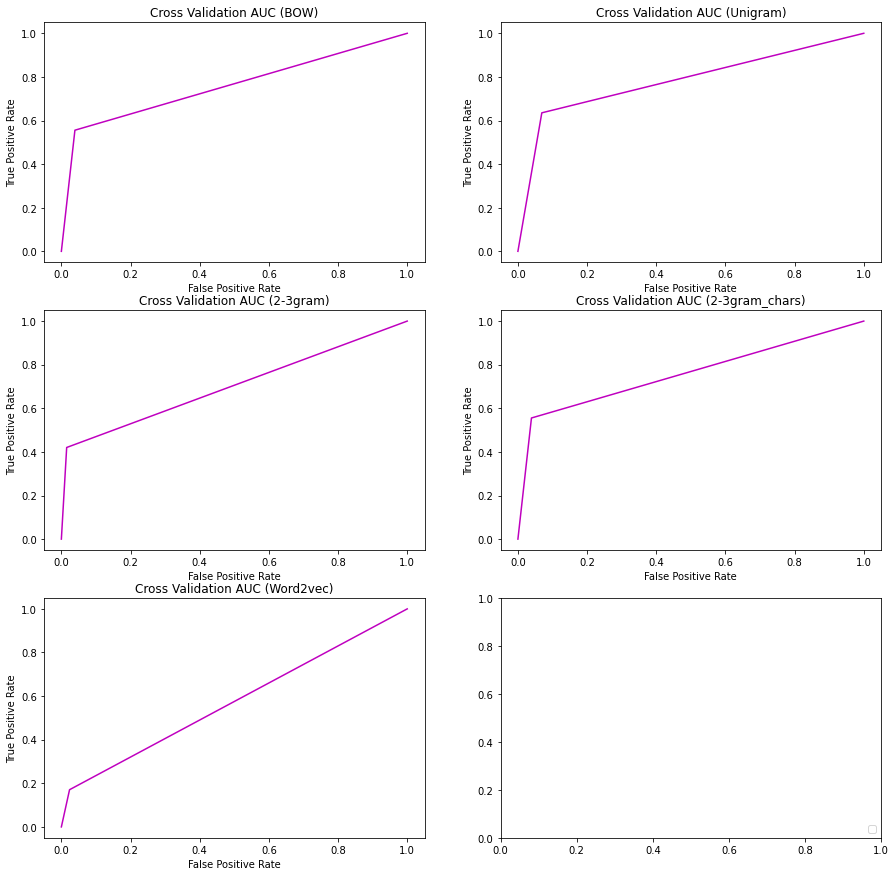

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))
#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#####fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///

#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')

#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//

#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)

#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)

#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

Fasttext

In [ ]:
from gensim.models import FastText
modelF = FastText(
        x_tokenized,
        window=10,
        min_count=5,
        workers=4,sg=1)

In [ ]:
sequencerF = Sequencer(all_words = [token for seq in x_tokenized for token in seq],
              max_words = 1200,
              seq_len = 15,
              embedding_matrix = modelF.wv
             )

In [ ]:
test_vecF = sequencerF.textToVector("i am in love with you")
test_vecF

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_vecsF = np.asarray([sequencerF.textToVector(" ".join(seq)) for seq in x_tokenized])
print(x_vecsF.shape)

(5719, 1500)


In [ ]:

from sklearn.decomposition import PCA
pca_modelF = PCA(n_components=50)
pca_modelF.fit(x_vecs)
print("Sum of variance ratios: ",sum(pca_modelF.explained_variance_ratio_))

Sum of variance ratios:  0.9911234324024548


In [ ]:
x_compsF = pca_modelF.transform(x_vecs)
x_compsF.shape

(5719, 50)

In [ ]:
x_trainf,x_testf,y_trainf,y_testf = train_test_split(x_compsF,y,test_size=0.2,random_state=42)
print(x_trainf.shape)
print(x_testf.shape)
print(y_trainf.shape)
print(y_testf.shape)

(4575, 50)
(1144, 50)
(4575,)
(1144,)


In [ ]:
start = time.time()

svm_classifierf = SVC()
svm_classifierf.fit(x_trainf,y_trainf)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 0.99 seconds


In [ ]:
svm_classifierf.score(x_testf,y_testf)

0.7657342657342657

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score , classification_report
def train_model2f(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)


    return classification_report(predictions, y_testf)

In [ ]:
accuracyf = train_model2f(svm_classifierf, x_trainf, y_trainf, x_testf)
print ("SVM+fasttext ", accuracyf)

SVM+fasttext                precision    recall  f1-score   support

           0       0.98      0.77      0.86      1073
           1       0.17      0.72      0.28        71

    accuracy                           0.77      1144
   macro avg       0.57      0.74      0.57      1144
weighted avg       0.93      0.77      0.82      1144



In [ ]:
from sklearn.model_selection import GridSearchCV
model1f=SVC()

In [ ]:
grid1f = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid1f.fit(x_trainf, y_trainf)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.751 total time=   6.5s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.745 total time=   5.4s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.752 total time=   5.6s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.762 total time=   5.9s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, probability=True;, score=0.775 total time=   5.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.789 total time=   6.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.779 total time=   5.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=1, kernel=rbf, probability=True;, score=0.784 total time=   6.2s
[CV 4/5] END C=10, class_w

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'gamma': [0.1, 1], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid1f.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid1f.best_estimator_)

grid_predictions1f = grid1f.predict(x_testf)

# print classification report
print(classification_report(y_testf, grid_predictions1f))

{'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf', 'probability': True}
SVC(C=10, class_weight='balanced', gamma=1, probability=True)
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       845
           1       0.71      0.33      0.45       299

    accuracy                           0.79      1144
   macro avg       0.75      0.64      0.66      1144
weighted avg       0.78      0.79      0.76      1144



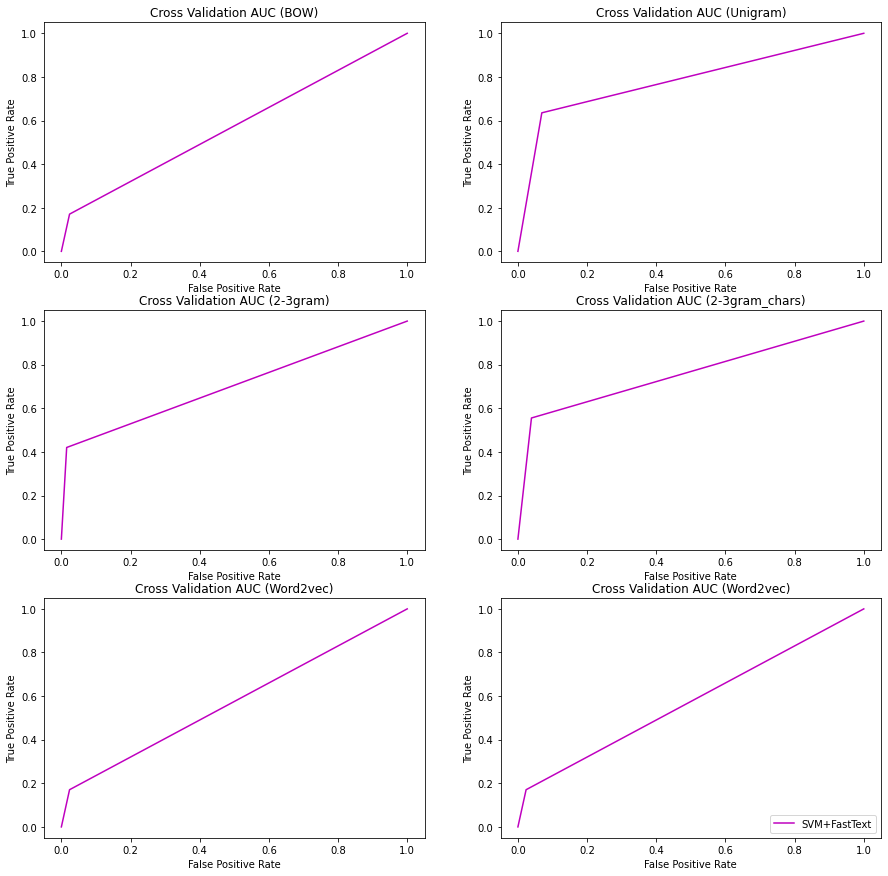

In [ ]:
#Try 6 plots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///

#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')

#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//

#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)

#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)

#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM+FastText', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

NB

In [ ]:
#9
from sklearn.naive_bayes import MultinomialNB, GaussianNB
# create a count vectorizer object
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#model2 = MultinomialNB()
model2=GaussianNB()
model2.fit(xtrain_count.toarray(), train_y)

# print prediction results
predictions21 = model2.predict(xvalid_count.toarray())
print(classification_report(valid_y, predictions21))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1302
           1       0.63      0.57      0.60       414

    accuracy                           0.82      1716
   macro avg       0.75      0.73      0.74      1716
weighted avg       0.81      0.82      0.81      1716



In [ ]:
#10
#param_grid = {"gamma": [0.1, 1.0, 10, 100]}
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid2 = {#'var_smoothing': np.logspace(0,-11, num=100)
                'var_smoothing': np.logspace(-6,-9)#, num=100)
              }

In [ ]:
grid2 = GridSearchCV(estimator=model2,
                 param_grid=param_grid2,
                 refit = True,#cv=cv_method,   # use any cross validation technique
                 verbose=1,
                 scoring='accuracy')
#alpha_range = [ 10**i for i in range(-6, 4)]
#grid = GridSearchCV(model2, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid2.fit(xtrain_count.toarray(), train_y)

# print best parameter after tuning
print(grid2.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'var_smoothing': 1e-06}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

grid_predictions2 = grid2.predict(xvalid_count.toarray())

# print classification report
print(classification_report(valid_y, grid_predictions2))

GaussianNB(var_smoothing=4.641588833612782e-06)
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1302
           1       0.63      0.57      0.60       414

    accuracy                           0.82      1716
   macro avg       0.75      0.73      0.74      1716
weighted avg       0.81      0.82      0.81      1716



NB BOW

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# create a count vectorizer object
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDFx)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

#model2 = MultinomialNB()
#model2.fit(xtrain_count, train_y)

# print prediction results
predictions21 = model2.predict(xvalid_count.toarray())
print(classification_report(valid_y, predictions21))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1302
           1       0.63      0.57      0.60       414

    accuracy                           0.82      1716
   macro avg       0.75      0.73      0.74      1716
weighted avg       0.81      0.82      0.81      1716



In [ ]:
grid2 = GridSearchCV(model2, param_grid2, refit = True, verbose = 3)

# fitting the model for grid search
grid2.fit(xtrain_count.toarray(), train_y)

# print best parameter after tuning
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

grid_predictions2 = grid2.predict(xvalid_count.toarray())

# print classification report
print(classification_report(valid_y, grid_predictions2))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.321 total time=   2.3s
[CV 2/5] END .................var_smoothing=1.0;, score=0.334 total time=   2.3s
[CV 3/5] END .................var_smoothing=1.0;, score=0.314 total time=   2.1s
[CV 4/5] END .................var_smoothing=1.0;, score=0.319 total time=   2.1s
[CV 5/5] END .................var_smoothing=1.0;, score=0.331 total time=   2.1s
[CV 1/5] END ..var_smoothing=0.7742636826811271;, score=0.321 total time=   2.1s
[CV 2/5] END ..var_smoothing=0.7742636826811271;, score=0.333 total time=   2.1s
[CV 3/5] END ..var_smoothing=0.7742636826811271;, score=0.314 total time=   2.3s
[CV 4/5] END ..var_smoothing=0.7742636826811271;, score=0.319 total time=   2.1s
[CV 5/5] END ..var_smoothing=0.7742636826811271;, score=0.330 total time=   2.1s
[CV 1/5] END ...var_smoothing=0.599484250318941;, score=0.321 total time=   2.1s
[CV 2/5] END ...var_smoothing=0.59948425031894

NB word level

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=50000)
tfidf_vect.fit(trainDFx)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

#model2 = MultinomialNB()
#model2.fit(xtrain_tfidf, train_y)

# print prediction results
predictions22 = model2.predict(xvalid_tfidf.toarray())
print(classification_report(valid_y, predictions22))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1302
           1       0.63      0.57      0.60       414

    accuracy                           0.82      1716
   macro avg       0.75      0.73      0.74      1716
weighted avg       0.81      0.82      0.81      1716



In [ ]:
# fitting the model for grid search
grid2.fit(xtrain_tfidf.toarray(), train_y)

# print best parameter after tuning
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

grid_predictions22 = grid2.predict(xvalid_tfidf.toarray())

# print classification report
print(classification_report(valid_y, grid_predictions22))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.614 total time=   1.9s
[CV 2/5] END .................var_smoothing=1.0;, score=0.569 total time=   1.8s
[CV 3/5] END .................var_smoothing=1.0;, score=0.639 total time=   1.8s
[CV 4/5] END .................var_smoothing=1.0;, score=0.589 total time=   1.8s
[CV 5/5] END .................var_smoothing=1.0;, score=0.579 total time=   1.8s
[CV 1/5] END ..var_smoothing=0.7742636826811271;, score=0.457 total time=   2.0s
[CV 2/5] END ..var_smoothing=0.7742636826811271;, score=0.449 total time=   1.8s
[CV 3/5] END ..var_smoothing=0.7742636826811271;, score=0.456 total time=   1.8s
[CV 4/5] END ..var_smoothing=0.7742636826811271;, score=0.417 total time=   1.8s
[CV 5/5] END ..var_smoothing=0.7742636826811271;, score=0.431 total time=   1.8s
[CV 1/5] END ...var_smoothing=0.599484250318941;, score=0.402 total time=   1.8s
[CV 2/5] END ...var_smoothing=0.59948425031894

NB ngram_range=(2,3)

In [ ]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDFx)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


#model2 = MultinomialNB()
#model2.fit(xtrain_tfidf_ngram, train_y)

# print prediction results
#predictions = model2.predict(xvalid_tfidf_ngram)
#print(classification_report(valid_y, predictions))

# fitting the model for grid search
grid2.fit(xtrain_tfidf_ngram.toarray(), train_y)

# print best parameter after tuning
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

grid_predictions23 = grid2.predict(xvalid_tfidf_ngram.toarray())

# print classification report
print(classification_report(valid_y, grid_predictions23))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'var_smoothing': 1e-06}
GaussianNB(var_smoothing=1e-06)
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1302
           1       0.42      0.76      0.54       414

    accuracy                           0.69      1716
   macro avg       0.66      0.72      0.66      1716
weighted avg       0.78      0.69      0.71      1716



NB characters level

In [ ]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=50000)
tfidf_vect_ngram_chars.fit(trainDFx)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


#model2 = MultinomialNB()
#model2.fit(xtrain_tfidf_ngram_chars, train_y)

# print prediction results
#predictions = model2.predict(xvalid_tfidf_ngram_chars)
#print(classification_report(valid_y, predictions))

# fitting the model for grid search
grid2.fit(xtrain_tfidf_ngram_chars.toarray(), train_y)

# print best parameter after tuning
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

grid_predictions24 = grid2.predict(xvalid_tfidf_ngram_chars.toarray())

# print classification report
print(classification_report(valid_y, grid_predictions24))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:558: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.713 total time=   3.7s
[CV 2/5] END .................var_smoothing=1.0;, score=0.743 total time=   2.9s
[CV 3/5] END .................var_smoothing=1.0;, score=0.716 total time=   2.9s
[CV 4/5] END .................var_smoothing=1.0;, score=0.724 total time=   2.9s
[CV 5/5] END .................var_smoothing=1.0;, score=0.705 total time=   3.0s
[CV 1/5] END ..var_smoothing=0.7742636826811271;, score=0.647 total time=   2.9s
[CV 2/5] END ..var_smoothing=0.7742636826811271;, score=0.674 total time=   2.9s
[CV 3/5] END ..var_smoothing=0.7742636826811271;, score=0.644 total time=   2.9s
[CV 4/5] END ..var_smoothing=0.7742636826811271;, score=0.657 total time=   3.0s
[CV 5/5] END ..var_smoothing=0.7742636826811271;, score=0.652 total time=   2.9s
[CV 1/5] END ...var_smoothing=0.599484250318941;, score=0.604 total time=   2.9s
[CV 2/5] END ...var_smoothing=0.59948425031894

NB + word2cev

In [ ]:
accuracy = train_model2(model2, x_train, y_train, x_test)
print ("GNB", accuracy)

GNB               precision    recall  f1-score   support

           0       0.44      0.87      0.58       424
           1       0.82      0.34      0.48       720

    accuracy                           0.54      1144
   macro avg       0.63      0.60      0.53      1144
weighted avg       0.68      0.54      0.52      1144



In [ ]:
#model22= GaussianNB()
grid25 = GridSearchCV(model2, param_grid2, refit = True, verbose = 3)
# fitting the model for grid search
#grid2.fit(xtrain_count, train_y)
grid25.fit(x_train, y_train)

# print best parameter after tuning
print(grid25.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid25.best_estimator_)

grid_predictions25 = grid25.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions25))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.753 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.753 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.754 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.754 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.754 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.7742636826811271;, score=0.753 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.7742636826811271;, score=0.753 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.7742636826811271;, score=0.754 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.7742636826811271;, score=0.754 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.7742636826811271;, score=0.754 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.599484250318941;, score=0.753 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.59948425031894

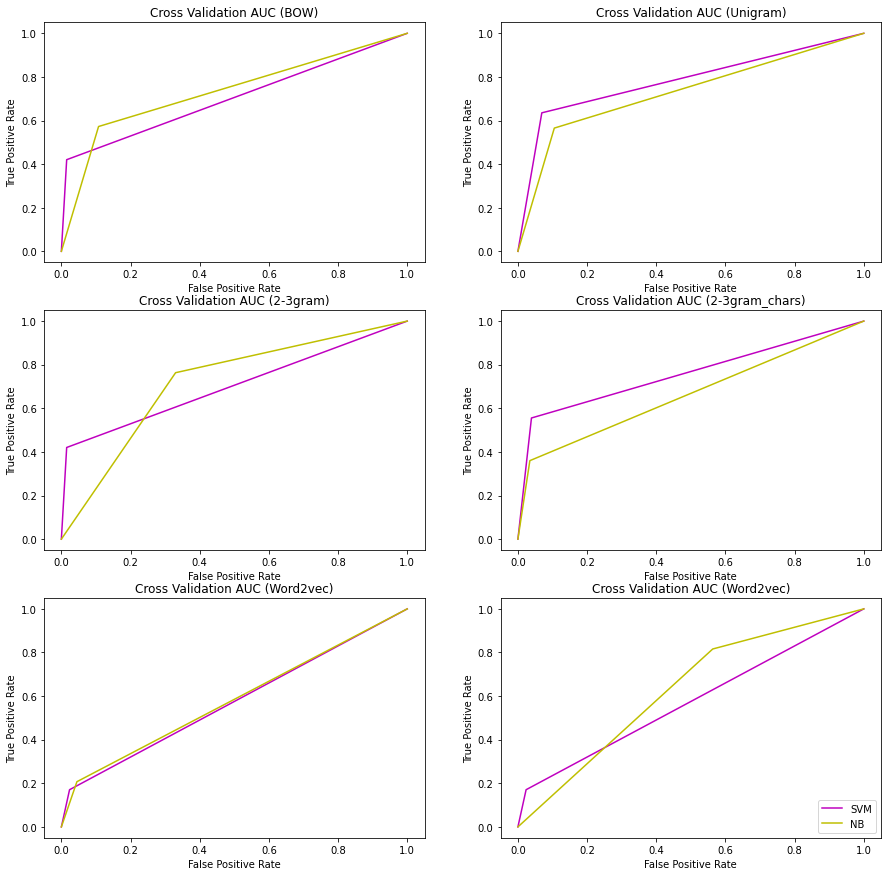

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')

#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)

#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
###
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)

grid_predictions15f=model2.predict(x_testf)
predictions25f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions25f)
acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'y',label='NB', lw=1.5)
#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

NB+ FastText

In [ ]:
accuracy2f = train_model2f(model2, x_trainf, y_trainf, x_testf)
print ("NB+fasttext ", accuracy2f)

NB+fasttext                precision    recall  f1-score   support

           0       0.44      0.87      0.58       424
           1       0.82      0.34      0.48       720

    accuracy                           0.54      1144
   macro avg       0.63      0.60      0.53      1144
weighted avg       0.68      0.54      0.52      1144



In [ ]:
#model22= GaussianNB()
grid25f = GridSearchCV(model2, param_grid2, refit = True, verbose = 3)
# fitting the model for grid search
#grid2.fit(xtrain_count, train_y)
grid25f.fit(x_trainf, y_trainf)

# print best parameter after tuning
print(grid25f.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid25f.best_estimator_)

grid_predictions25f = grid25f.predict(x_testf)

# print classification report
print(classification_report(y_testf, grid_predictions25f))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...............var_smoothing=1e-06;, score=0.544 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-06;, score=0.525 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-06;, score=0.511 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-06;, score=0.515 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-06;, score=0.530 total time=   0.0s
[CV 1/5] END var_smoothing=8.685113737513521e-07;, score=0.544 total time=   0.0s
[CV 2/5] END var_smoothing=8.685113737513521e-07;, score=0.525 total time=   0.0s
[CV 3/5] END var_smoothing=8.685113737513521e-07;, score=0.511 total time=   0.0s
[CV 4/5] END var_smoothing=8.685113737513521e-07;, score=0.515 total time=   0.0s
[CV 5/5] END var_smoothing=8.685113737513521e-07;, score=0.530 total time=   0.0s
[CV 1/5] END var_smoothing=7.543120063354623e-07;, score=0.544 total time=   0.0s
[CV 2/5] END var_smoothing=7.543120063354

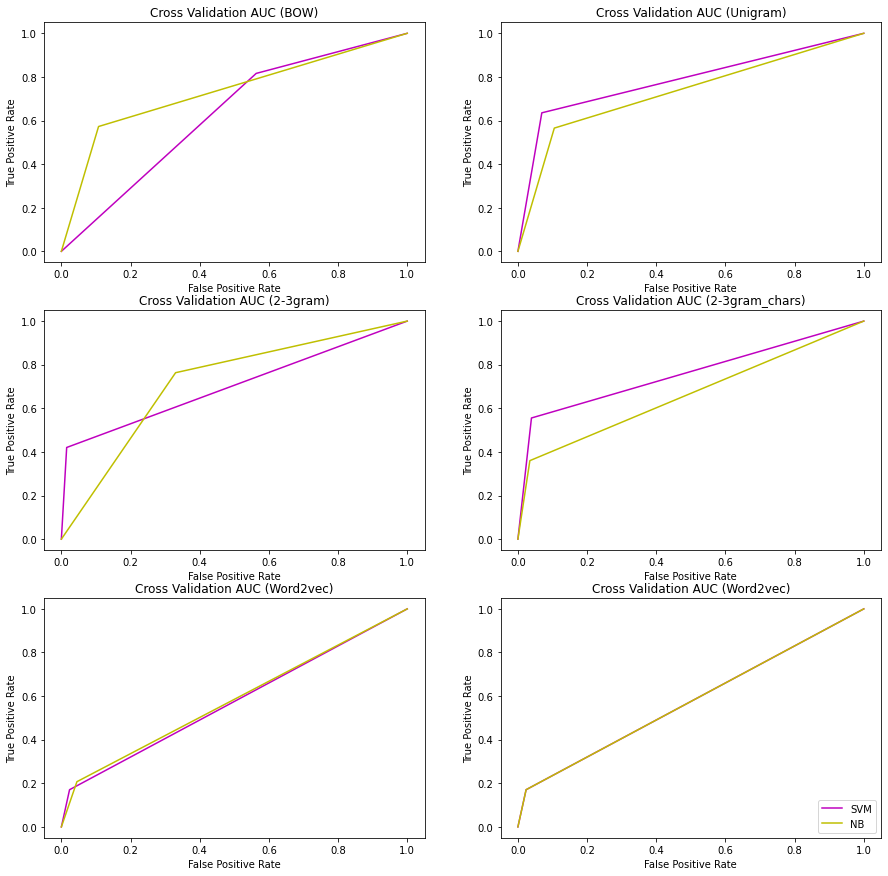

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')

#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)

#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

KNN

In [ ]:
#12
#clf = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
#clf.fit(X_train_res, y_train_res)

from sklearn.neighbors import KNeighborsClassifier
# create a count vectorizer object
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDFx)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

model3 = KNeighborsClassifier()
#model.fit(xtrain_count, train_y)

# print prediction results
#predictions = model.predict(xvalid_count)
#print(classification_report(valid_y, predictions))

In [ ]:
from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

# defining parameter range
k_range = list(range(7, 31))
param_grid3 = dict(n_neighbors=k_range)

grid3 = GridSearchCV(model3, param_grid3, refit = True, verbose = 3)

# fitting the model for grid search
grid3.fit(xtrain_count, train_y)

# print best parameter after tuning
print(grid3.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid3.best_estimator_)

grid_predictions3 = grid3.predict(xvalid_count)

# print classification report
print(classification_report(valid_y, grid_predictions3))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....................n_neighbors=7;, score=0.501 total time=   0.5s
[CV 2/5] END .....................n_neighbors=7;, score=0.536 total time=   0.3s
[CV 3/5] END .....................n_neighbors=7;, score=0.494 total time=   0.2s
[CV 4/5] END .....................n_neighbors=7;, score=0.506 total time=   0.2s
[CV 5/5] END .....................n_neighbors=7;, score=0.484 total time=   0.2s
[CV 1/5] END .....................n_neighbors=8;, score=0.518 total time=   0.1s
[CV 2/5] END .....................n_neighbors=8;, score=0.574 total time=   0.2s
[CV 3/5] END .....................n_neighbors=8;, score=0.527 total time=   0.2s
[CV 4/5] END .....................n_neighbors=8;, score=0.527 total time=   0.2s
[CV 5/5] END .....................n_neighbors=8;, score=0.509 total time=   0.2s
[CV 1/5] END .....................n_neighbors=9;, score=0.489 total time=   0.2s
[CV 2/5] END .....................n_neighbors=9

KNN wordlevel

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDFx)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

model3 = KNeighborsClassifier()
model3.fit(xtrain_tfidf, train_y)

# print prediction results
predictions = model3.predict(xvalid_tfidf)
print(classification_report(valid_y, predictions))

# fitting the model for grid search
grid3.fit(xtrain_tfidf, train_y)

# print best parameter after tuning
print(grid3.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid3.best_estimator_)

grid_predictions32 = grid3.predict(xvalid_tfidf)

# print classification report
print(classification_report(valid_y, grid_predictions32))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1302
           1       0.47      0.75      0.58       414

    accuracy                           0.73      1716
   macro avg       0.69      0.74      0.69      1716
weighted avg       0.80      0.73      0.75      1716

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....................n_neighbors=7;, score=0.740 total time=   1.0s
[CV 2/5] END .....................n_neighbors=7;, score=0.715 total time=   1.0s
[CV 3/5] END .....................n_neighbors=7;, score=0.711 total time=   1.1s
[CV 4/5] END .....................n_neighbors=7;, score=0.733 total time=   1.0s
[CV 5/5] END .....................n_neighbors=7;, score=0.731 total time=   1.0s
[CV 1/5] END .....................n_neighbors=8;, score=0.758 total time=   1.0s
[CV 2/5] END .....................n_neighbors=8;, score=0.750 total time=   1.0s
[CV 3/5] END .....................n_neighbor

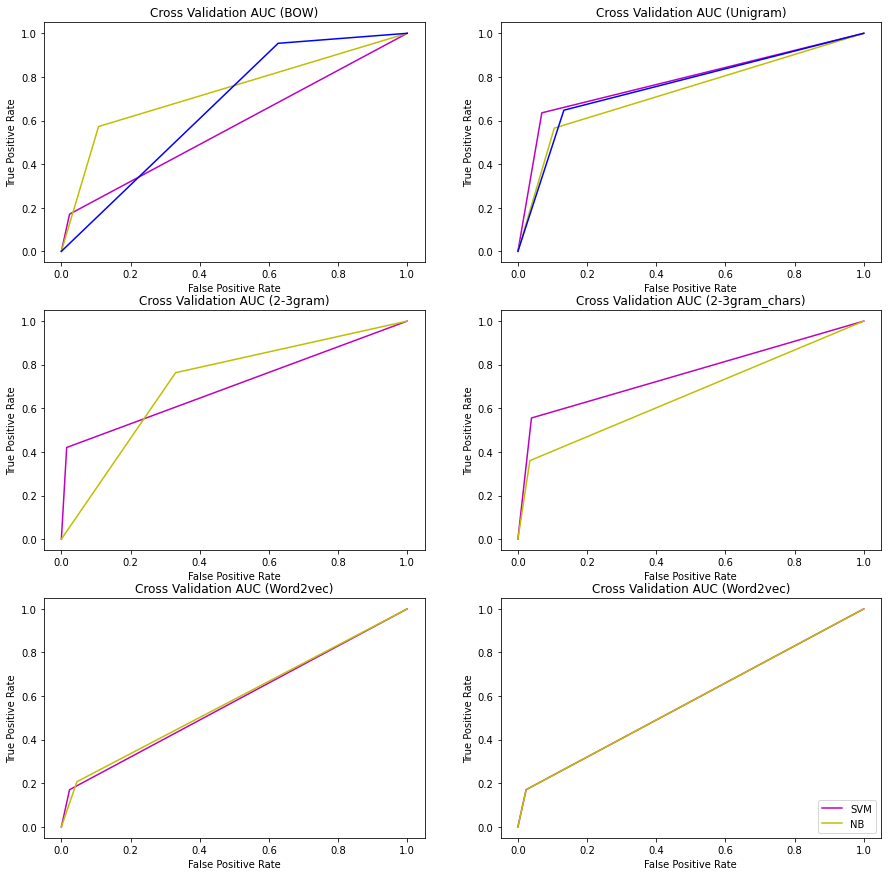

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)


#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//
#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)

#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

KNN ngram_range=(2,3)

In [ ]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDFx)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


model3 = KNeighborsClassifier()
#model3.fit(xtrain_tfidf_ngram, train_y)

# print prediction results
#predictions3 = model3.predict(xvalid_tfidf_ngram)
#print(classification_report(valid_y, predictions3))

# fitting the model for grid search
grid3.fit(xtrain_tfidf_ngram, train_y)

# print best parameter after tuning
print(grid3.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid3.best_estimator_)

grid_predictions33 = grid3.predict(xvalid_tfidf_ngram)

# print classification report
print(classification_report(valid_y, grid_predictions33))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....................n_neighbors=7;, score=0.814 total time=   0.8s
[CV 2/5] END .....................n_neighbors=7;, score=0.789 total time=   0.8s
[CV 3/5] END .....................n_neighbors=7;, score=0.780 total time=   0.8s
[CV 4/5] END .....................n_neighbors=7;, score=0.781 total time=   0.7s
[CV 5/5] END .....................n_neighbors=7;, score=0.796 total time=   0.8s
[CV 1/5] END .....................n_neighbors=8;, score=0.811 total time=   0.8s
[CV 2/5] END .....................n_neighbors=8;, score=0.787 total time=   0.8s
[CV 3/5] END .....................n_neighbors=8;, score=0.775 total time=   0.8s
[CV 4/5] END .....................n_neighbors=8;, score=0.779 total time=   0.9s
[CV 5/5] END .....................n_neighbors=8;, score=0.792 total time=   1.6s
[CV 1/5] END .....................n_neighbors=9;, score=0.814 total time=   1.1s
[CV 2/5] END .....................n_neighbors=9

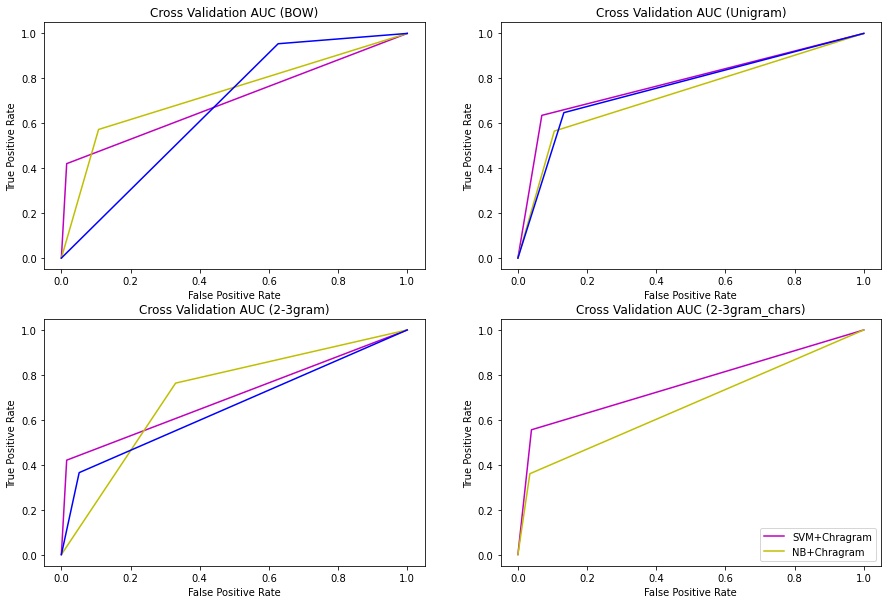

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))

accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#//
#///
#accuracy3 = train_model(model3, xtrain_count, train_y, xvalid_count)
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)
#//
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#####################################
accuracy12 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions12=grid_predictions12
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
acc.append(accuracy12)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model2, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)
#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#//
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#####################################
accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
acc.append(accuracy13)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#//
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
#acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#//
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions14=grid_predictions14
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
acc.append(accuracy14)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#//
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
plt.legend(loc='lower right')
plt.show()

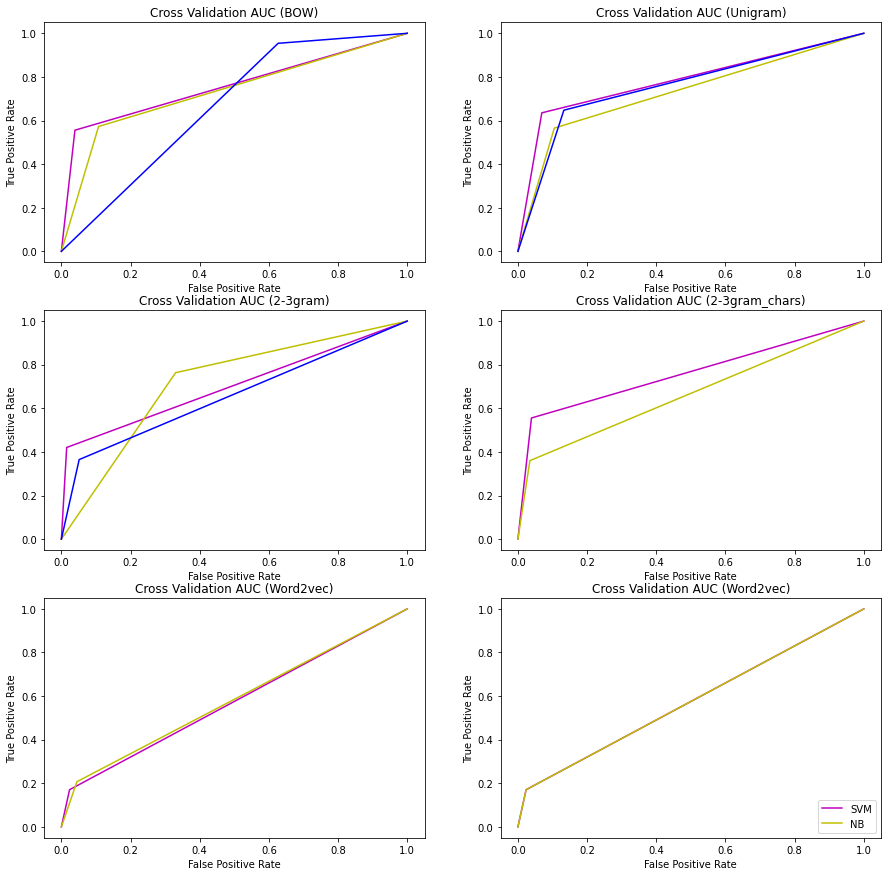

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)


#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//

#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)

#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

KNN characters level

In [ ]:
#13
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDFx)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


model3 = KNeighborsClassifier()
#model3.fit(xtrain_tfidf_ngram_chars, train_y)

# print prediction results
#predictions3 = model3.predict(xvalid_tfidf_ngram_chars)
#print(classification_report(valid_y, predictions3))

# fitting the model for grid search
grid3.fit(xtrain_tfidf_ngram_chars, train_y)

# print best parameter after tuning
print(grid3.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid3.best_estimator_)

grid_predictions34 = grid3.predict(xvalid_tfidf_ngram_chars)

# print classification report
print(classification_report(valid_y, grid_predictions34))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:558: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .....................n_neighbors=7;, score=0.765 total time= 1.0min
[CV 2/5] END .....................n_neighbors=7;, score=0.794 total time=  58.4s
[CV 3/5] END .....................n_neighbors=7;, score=0.782 total time=  59.3s
[CV 4/5] END .....................n_neighbors=7;, score=0.802 total time= 1.1min
[CV 5/5] END .....................n_neighbors=7;, score=0.797 total time=  57.8s
[CV 1/5] END .....................n_neighbors=8;, score=0.797 total time=  58.2s
[CV 2/5] END .....................n_neighbors=8;, score=0.805 total time=  58.4s
[CV 3/5] END .....................n_neighbors=8;, score=0.787 total time= 1.0min
[CV 4/5] END .....................n_neighbors=8;, score=0.819 total time=  58.9s
[CV 5/5] END .....................n_neighbors=8;, score=0.818 total time=  57.5s
[CV 1/5] END .....................n_neighbors=9;, score=0.787 total time=  58.2s
[CV 2/5] END .....................n_neighbors=9

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)


#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
predictions34=grid_predictions34
fpr34, tpr34, _ = roc_curve(valid_y, predictions34)
#acc.append(accuracy24)
ax4.plot(fpr34, tpr34, 'b',label='KNN+Chragram', lw=1.5)
#//
#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)

#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

KNN+word2cev

In [ ]:
accuracy3 = train_model2(model3, x_train, y_train, x_test)
print ("KNN ", accuracy3)

In [ ]:
grid3 = GridSearchCV(model3, param_grid3, refit = True, verbose = 3)

# fitting the model for grid search
grid3.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid3.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid3.best_estimator_)

grid_predictions3 = grid3.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions3))

KNN+FastText

In [ ]:
accuracyf = train_model2f(model3, x_trainf, y_trainf, x_testf)
print ("KNN+fasttext ", accuracyf)

In [ ]:
grid3f = GridSearchCV(model3, param_grid3, refit = True, verbose = 3)

# fitting the model for grid search
grid3f.fit(x_trainf, y_trainf)

In [ ]:
# print best parameter after tuning
print(grid3f.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid3f.best_estimator_)

grid_predictions3f = grid3f.predict(x_testf)

# print classification report
print(classification_report(y_testf, grid_predictions3f))

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)


#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
predictions34=grid_predictions34
fpr34, tpr34, _ = roc_curve(valid_y, predictions34)
#acc.append(accuracy24)
ax4.plot(fpr34, tpr34, 'b',label='KNN+Chragram', lw=1.5)
#//
#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions35=model3.predict(x_test)
predictions35=grid_predictions35
fpr35, tpr35, _ = roc_curve(y_test, predictions35)
#acc.append(accuracy24)
ax5.plot(fpr35, tpr35, 'b',label='KNN+Word2vec', lw=1.5)
#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)
#\\\
accuracy35f = train_model2f(model3, x_trainf, y_trainf, x_testf)
grid_predictions35f=model3.predict(x_testf)
predictions35f=grid_predictions35f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr3, tpr3, _ = roc_curve(y_testf, predictions35f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr3, tpr3, 'b',label='KNN', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [ ]:
#15
from sklearn.ensemble import RandomForestClassifier
#count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
#count_vect.fit(trainDFx)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

model4 = RandomForestClassifier()
model4.fit(xtrain_count, train_y)

# print prediction results
predictions4 = model4.predict(xvalid_count)
print(classification_report(valid_y, predictions4))
print(model4.get_params())


In [ ]:
#16
# defining parameter range
param_grid4 = {
    #'n_estimators': [100, 200,300,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [4,5,6,7,8],
    #'criterion' :['gini', 'entropy','log_loss'],

    ###'bootstrap': [True],

    #'max_depth': [80, 90, 100, 110],

    ###'max_features': [2, 3],

    ###'min_samples_leaf': [1,2,3, 4, 5],

    ###'min_samples_split': [2,6,8, 10, 12],

    'n_estimators': [100, 200, 300, 1000]
}

RF wordlevel

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDFx)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

model4 = RandomForestClassifier()
model4.fit(xtrain_tfidf, train_y)

# print prediction results
predictions42 = model4.predict(xvalid_tfidf)
print(classification_report(valid_y, predictions42))

RF ngram_range=(2,3)

In [ ]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDFx)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


model4 = RandomForestClassifier()
model4.fit(xtrain_tfidf_ngram, train_y)

# print prediction results
predictions43 = model4.predict(xvalid_tfidf_ngram)
print(classification_report(valid_y, predictions43))

# fitting the model for grid search
#grid.fit(xtrain_tfidf_ngram, train_y)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

#grid_predictions = grid.predict(xvalid_tfidf_ngram)

# print classification report
#print(classification_report(valid_y, grid_predictions))

In [ ]:
#Try 6 plots
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
#fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,3,figsize=(15,10))
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


#plt.subplots(figsize=(15, 5))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)


#plt.figure(figsize=(15, 5))
#ax1=plt.subplot(121)#(411)#(141)(131)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)
#predictions4=grid_predictions3
predictions4=predictions4
fpr4, tpr4, _ = roc_curve(valid_y, predictions4)
#acc.append(accuracy2)
ax1.plot(fpr34, tpr4, 'g',label='RF+BOW', lw=1.5)
#//

#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
#//
accuracy42 = train_model(model4, xtrain_tfidf, train_y, xvalid_tfidf)
#predictions32=grid_predictions32
predictions42=predictions42
fpr42, tpr42, _ = roc_curve(valid_y, predictions42)
acc.append(accuracy42)
ax2.plot(fpr42, tpr42, 'g',label='RF+Unigram', lw=1.5)
#//
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
predictions34=grid_predictions34
fpr34, tpr34, _ = roc_curve(valid_y, predictions34)
#acc.append(accuracy24)
ax4.plot(fpr34, tpr34, 'b',label='KNN+Chragram', lw=1.5)
#//
#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions35=model3.predict(x_test)
predictions35=grid_predictions35
fpr35, tpr35, _ = roc_curve(y_test, predictions35)
#acc.append(accuracy24)
ax5.plot(fpr35, tpr35, 'b',label='KNN+Word2vec', lw=1.5)
#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)
#\\\
accuracy35f = train_model2f(model3, x_trainf, y_trainf, x_testf)
grid_predictions35f=model3.predict(x_testf)
predictions35f=grid_predictions35f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr3, tpr3, _ = roc_curve(y_testf, predictions35f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr3, tpr3, 'b',label='KNN', lw=1.5)

#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

RF Characterlevel

In [ ]:
#17
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDFx)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


model4 = RandomForestClassifier()
model4.fit(xtrain_tfidf_ngram_chars, train_y)

# print prediction results
predictions44 = model4.predict(xvalid_tfidf_ngram_chars)
print(classification_report(valid_y, predictions44))

In [ ]:
#19xxxxxxxxxxxxxxx
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDFx)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


model4 = RandomForestClassifier()
model4.fit(xtrain_tfidf_ngram_chars, train_y)

# print prediction results
predictions4 = model4.predict(xvalid_tfidf_ngram_chars)
print(classification_report(valid_y, predictions4))


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))

accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
acc.append(accuracy1)
ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#//
#accuracy3 = train_model(model3, xtrain_count, train_y, xvalid_count)
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)
#//
#predictions4=grid_predictions3
predictions4=predictions4
fpr4, tpr4, _ = roc_curve(valid_y, predictions4)
#acc.append(accuracy2)
ax1.plot(fpr34, tpr4, 'g',label='RF+BOW', lw=1.5)
#//
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#####################################
accuracy12 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions12=grid_predictions12
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
acc.append(accuracy12)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
accuracy22 = train_model(model2, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)
#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#//
accuracy42 = train_model(model4, xtrain_tfidf, train_y, xvalid_tfidf)
#predictions32=grid_predictions32
predictions42=predictions42
fpr42, tpr42, _ = roc_curve(valid_y, predictions42)
acc.append(accuracy42)
ax2.plot(fpr42, tpr42, 'g',label='RF+Unigram', lw=1.5)
#//
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#####################################
accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
acc.append(accuracy13)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#//
accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#//
accuracy43 = train_model(model4, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions43=predictions43
fpr43, tpr43, _ = roc_curve(valid_y, predictions43)
acc.append(accuracy43)
ax3.plot(fpr43, tpr43, 'b',label='RF+Ngram', lw=1.5)
#//
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions14=grid_predictions14
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
acc.append(accuracy14)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#//
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions34=grid_predictions34
fpr34, tpr34, _ = roc_curve(valid_y, predictions34)
#acc.append(accuracy24)
ax4.plot(fpr34, tpr34, 'b',label='KNN+Chragram', lw=1.5)
#//
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions44=predictions44 #model4.predict(xvalid_tfidf_ngram_chars)
fpr44, tpr44, _ = roc_curve(valid_y, predictions44)
#acc.append(accuracy24)
ax4.plot(fpr44, tpr44, 'g',label='RF+Chragram', lw=1.5)
#//

ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
plt.legend(loc='lower right')
plt.show()


RF+word2vec

In [ ]:
accuracy4 = train_model2(model4, x_train, y_train, x_test)
print ("RF", accuracy4)

In [ ]:
#model22= GaussianNB()
grid45 = GridSearchCV(model4, param_grid4, refit = True, verbose = 3)
# fitting the model for grid search
#grid2.fit(xtrain_count, train_y)
grid45.fit(x_train, y_train)

# print best parameter after tuning
print(grid45.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid45.best_estimator_)

grid_predictions45 = grid45.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions45))

RF+fasttext

In [ ]:
accuracy4f = train_model2f(model4, x_trainf, y_trainf, x_testf)
print ("NB+fasttext ", accuracy4f)

In [ ]:
#model22= GaussianNB()
grid45f = GridSearchCV(model4, param_grid4, refit = True, verbose = 3)
# fitting the model for grid search
#grid2.fit(xtrain_count, train_y)
grid45f.fit(x_trainf, y_trainf)

# print best parameter after tuning
print(grid45f.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid45f.best_estimator_)

grid_predictions45f = grid45f.predict(x_testf)

# print classification report
print(classification_report(y_testf, grid_predictions45f))

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
#acc.append(accuracy1)

ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)
#predictions4=grid_predictions3
predictions4=predictions4
fpr4, tpr4, _ = roc_curve(valid_y, predictions4)
#acc.append(accuracy2)
ax1.plot(fpr34, tpr4, 'g',label='RF+BOW', lw=1.5)
#//

#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
#//
accuracy42 = train_model(model4, xtrain_tfidf, train_y, xvalid_tfidf)
#predictions32=grid_predictions32
predictions42=predictions42
fpr42, tpr42, _ = roc_curve(valid_y, predictions42)
acc.append(accuracy42)
ax2.plot(fpr42, tpr42, 'g',label='RF+Unigram', lw=1.5)
#//
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#//
accuracy43 = train_model(model4, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions43=predictions43
fpr43, tpr43, _ = roc_curve(valid_y, predictions43)
acc.append(accuracy43)
ax3.plot(fpr43, tpr43, 'g',label='RF+Ngram', lw=1.5)
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
predictions34=grid_predictions34
fpr34, tpr34, _ = roc_curve(valid_y, predictions34)
#acc.append(accuracy24)
ax4.plot(fpr34, tpr34, 'b',label='KNN+Chragram', lw=1.5)
#//
predictions44=predictions44
fpr44, tpr44, _ = roc_curve(valid_y, predictions44)
#acc.append(accuracy24)
ax4.plot(fpr44, tpr44, 'g',label='RF+Chragram', lw=1.5)
#//
#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions35=model3.predict(x_test)
predictions35=grid_predictions35
fpr35, tpr35, _ = roc_curve(y_test, predictions35)
#acc.append(accuracy24)
ax5.plot(fpr35, tpr35, 'b',label='KNN+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions45=model4.predict(x_test)
predictions45=grid_predictions45
fpr45, tpr45, _ = roc_curve(y_test, predictions45)
#acc.append(accuracy24)
ax5.plot(fpr45, tpr45, 'g',label='RF+Word2vec', lw=1.5)
#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)
#\\\
accuracy35f = train_model2f(model3, x_trainf, y_trainf, x_testf)
grid_predictions35f=model3.predict(x_testf)
predictions35f=grid_predictions35f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr3, tpr3, _ = roc_curve(y_testf, predictions35f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr3, tpr3, 'b',label='KNN', lw=1.5)
#//
accuracy45f = train_model2f(model4, x_trainf, y_trainf, x_testf)
grid_predictions45f=model4.predict(x_testf)
predictions45f=grid_predictions45f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr4, tpr4, _ = roc_curve(y_testf, predictions45f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr4, tpr4, 'g',label='RF', lw=1.5)
#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (Word2vec)')
plt.legend(loc='lower right')
plt.show()

XGBoost

In [ ]:
#20
#import xgboost as xgb
from xgboost import XGBClassifier
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDFx)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

model5 = XGBClassifier()
model5.fit(xtrain_count, train_y)

# print prediction results
predictions5 = model5.predict(xvalid_count)
print(classification_report(valid_y, predictions5))
print(model5.get_params())


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1302
           1       0.76      0.37      0.50       414

    accuracy                           0.82      1716
   macro avg       0.79      0.67      0.69      1716
weighted avg       0.81      0.82      0.80      1716

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
#21
# defining parameter range
param_grid5 = {#'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0,0.3,0.5,1],#0.05], #so called `eta` value
              'max_depth': [0,1,2,3,4,5,6,7],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5,1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
#‘criterion’: ‘entropy’, ‘splitter’: ‘random’
#grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
#grid.fit(xtrain_count, train_y)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

#grid_predictions = grid.predict(xvalid_count)

# print classification report
#print(classification_report(valid_y, grid_predictions))

XGBoost wordlevel

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDFx)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

model5 = XGBClassifier()
model5.fit(xtrain_tfidf, train_y)

# print prediction results
predictions52 = model5.predict(xvalid_tfidf)
print(classification_report(valid_y, predictions52))

# fitting the model for grid search
#grid.fit(xtrain_tfidf, train_y)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

#grid_predictions = grid.predict(xvalid_tfidf)

# print classification report
#print(classification_report(valid_y, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1302
           1       0.82      0.41      0.54       414

    accuracy                           0.84      1716
   macro avg       0.83      0.69      0.72      1716
weighted avg       0.83      0.84      0.81      1716



XGBoost ngram 2,3

In [ ]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDFx)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


model5 = XGBClassifier()
model5.fit(xtrain_tfidf_ngram, train_y)

# print prediction results
predictions53 = model5.predict(xvalid_tfidf_ngram)
print(classification_report(valid_y, predictions53))

# fitting the model for grid search
#grid.fit(xtrain_tfidf_ngram, train_y)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

#grid_predictions = grid.predict(xvalid_tfidf_ngram)

# print classification report
#print(classification_report(valid_y, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1302
           1       0.79      0.23      0.35       414

    accuracy                           0.80      1716
   macro avg       0.79      0.60      0.62      1716
weighted avg       0.80      0.80      0.75      1716



GXBoost characterlevel

In [ ]:
#22
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDFx)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


model5 = XGBClassifier()
model5.fit(xtrain_tfidf_ngram_chars, train_y)

# print prediction results
predictions54 = model5.predict(xvalid_tfidf_ngram_chars)
print(classification_report(valid_y, predictions54))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1302
           1       0.77      0.56      0.65       414

    accuracy                           0.85      1716
   macro avg       0.82      0.75      0.78      1716
weighted avg       0.85      0.85      0.84      1716



GXB+word2vec

In [ ]:
accuracy5 = train_model2(model5, x_train, y_train, x_test)
print ("GXB ", accuracy5)

In [ ]:
grid5 = GridSearchCV(model5, param_grid5, refit = True, verbose = 3)

# fitting the model for grid search
grid5.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid5.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid5.best_estimator_)

grid_predictions5 = grid5.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions3))

GXB+Fasttext

In [ ]:
accuracy5f = train_model2f(model5, x_trainf, y_trainf, x_testf)
print ("KNN+fasttext ", accuracy5f)

In [ ]:
grid5f = GridSearchCV(model5, param_grid5, refit = True, verbose = 3)

# fitting the model for grid search
grid5f.fit(x_trainf, y_trainf)

In [ ]:
# print best parameter after tuning
print(grid5f.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid5f.best_estimator_)

grid_predictions5f = grid5f.predict(x_testf)

# print classification report
print(classification_report(y_testf, grid_predictions5f))

In [ ]:
#24
# characters level tf-idf
#tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
#tfidf_vect_ngram_chars.fit(trainDFx)
#xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
#xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)


#model5 = XGBClassifier()
#model5.fit(xtrain_tfidf_ngram_chars, train_y)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2,figsize=(15,15))
#accuracy1 = train_model(model1, xtrain_count, train_y, xvalid_count)
predictions1=grid_predictions1
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
#fpr1, tpr1, _ = roc_curve(valid_y, predictions1)
#acc.append(accuracy1)

ax1.plot(fpr1, tpr1, 'm',label='SVM+BOW', lw=1.5)
#///
#accuracy2 = train_model(model2, xtrain_count, train_y, xvalid_count)
predictions2=grid_predictions2
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(valid_y, predictions2)
#acc.append(accuracy2)
ax1.plot(fpr2, tpr2, 'y',label='NB+BOW', lw=1.5)
#ax1.set_title('BOW')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Cross Validation AUC (BOW)')
#plt.legend(loc='lower right')
predictions3=grid_predictions3
fpr3, tpr3, _ = roc_curve(valid_y, predictions3)
#acc.append(accuracy2)
ax1.plot(fpr3, tpr3, 'b',label='KNN+BOW', lw=1.5)
#predictions4=grid_predictions3
predictions4=predictions4
fpr4, tpr4, _ = roc_curve(valid_y, predictions4)
#acc.append(accuracy2)
ax1.plot(fpr34, tpr4, 'g',label='RF+BOW', lw=1.5)
#//
#predictions4=grid_predictions3
predictions5=predictions5
fpr5, tpr5, _ = roc_curve(valid_y, predictions5)
#acc.append(accuracy2)
ax1.plot(fpr5, tpr5, 'r',label='GXBoost+BOW', lw=1.5)
#//
#####################################
predictions12=grid_predictions12
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions12)
#acc.append(accuracy12)
#plt.figure(figsize=(15, 5))
#ax2=plt.subplot(122)#(412)#(142)(132)
ax2.plot(fpr1, tpr1, 'm',label='SVM+Unigram', lw=1.5)
#//
#accuracy22 = train_model(model1, xtrain_tfidf, train_y, xvalid_tfidf)
predictions22=grid_predictions22
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr22, tpr22, _ = roc_curve(valid_y, predictions22)
#acc.append(accuracy22)
ax2.plot(fpr22, tpr22, 'y',label='NB+Unigram', lw=1.5)

#//

#//
accuracy32 = train_model(model3, xtrain_tfidf, train_y, xvalid_tfidf)
predictions32=grid_predictions32
fpr32, tpr32, _ = roc_curve(valid_y, predictions32)
acc.append(accuracy32)
ax2.plot(fpr32, tpr32, 'b',label='KNN+Unigram', lw=1.5)
#ax2.set_title('Unigram')
#//
accuracy42 = train_model(model4, xtrain_tfidf, train_y, xvalid_tfidf)
#predictions32=grid_predictions32
predictions42=predictions42
fpr42, tpr42, _ = roc_curve(valid_y, predictions42)
acc.append(accuracy42)
ax2.plot(fpr42, tpr42, 'g',label='RF+Unigram', lw=1.5)
#//
accuracy52 = train_model(model5, xtrain_tfidf, train_y, xvalid_tfidf)
#predictions32=grid_predictions32
predictions52=predictions52
fpr52, tpr52, _ = roc_curve(valid_y, predictions52)
acc.append(accuracy52)
ax2.plot(fpr52, tpr52, 'r',label='GXBoost+Unigram', lw=1.5)
#//
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Cross Validation AUC (Unigram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy13 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions13=grid_predictions13
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions13)
#acc.append(accuracy13)
#plt.figure(figsize=(15, 5))
#ax3=plt.subplot(221)#(413)#(143)(133)
ax3.plot(fpr1, tpr1, 'm',label='SVM+Ngram', lw=1.5)
#\\
#accuracy23 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions23=grid_predictions23
fpr23, tpr23, _ = roc_curve(valid_y, predictions23)
#acc.append(accuracy23)
ax3.plot(fpr23, tpr23, 'y',label='NB+Ngram', lw=1.5)
#//
#//
accuracy33 = train_model(model3, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions33=grid_predictions33
fpr33, tpr33, _ = roc_curve(valid_y, predictions33)
acc.append(accuracy33)
ax3.plot(fpr33, tpr33, 'b',label='KNN+Ngram', lw=1.5)
#//
accuracy43 = train_model(model4, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions43=predictions43
fpr43, tpr43, _ = roc_curve(valid_y, predictions43)
acc.append(accuracy43)
ax3.plot(fpr43, tpr43, 'g',label='RF+Ngram', lw=1.5)
#//
accuracy53 = train_model(model5, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions53=predictions53
fpr53, tpr53, _ = roc_curve(valid_y, predictions53)
acc.append(accuracy53)
ax3.plot(fpr53, tpr53, 'r',label='GXBoost+Ngram', lw=1.5)
#ax3.set_title('2-3gram')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Cross Validation AUC (2-3gram)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
#accuracy14 = train_model(model1, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
predictions14=grid_predictions14
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(valid_y, predictions14)
#acc.append(accuracy14)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax4.plot(fpr1, tpr1, 'm',label='SVM+Chragram', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions24=grid_predictions24
fpr24, tpr24, _ = roc_curve(valid_y, predictions24)
#acc.append(accuracy24)
ax4.plot(fpr24, tpr24, 'y',label='NB+Chragram', lw=1.5)
#//
predictions34=grid_predictions34
fpr34, tpr34, _ = roc_curve(valid_y, predictions34)
#acc.append(accuracy24)
ax4.plot(fpr34, tpr34, 'b',label='KNN+Chragram', lw=1.5)
#//
predictions44=predictions44
fpr44, tpr44, _ = roc_curve(valid_y, predictions44)
#acc.append(accuracy24)
ax4.plot(fpr44, tpr44, 'g',label='RF+Chragram', lw=1.5)
#//
#//
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions54=predictions54
fpr54, tpr54, _ = roc_curve(valid_y, predictions54)
#acc.append(accuracy24)
ax4.plot(fpr54, tpr54, 'r',label='GXBoost+Chragram', lw=1.5)
#//
#ax4.set_title('2-3gram')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Cross Validation AUC (2-3gram_chars)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15 = train_model2(svm_classifier, x_train, y_train, x_test)

grid_predictions15=svm_classifier.predict(x_test)
predictions15=grid_predictions15
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_test, predictions15)
#acc.append(accuracy15)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax5.plot(fpr1, tpr1, 'm',label='SVM+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
predictions25=grid_predictions25
fpr25, tpr25, _ = roc_curve(y_test, predictions25)
#acc.append(accuracy24)
ax5.plot(fpr25, tpr25, 'y',label='NB+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions35=model3.predict(x_test)
predictions35=grid_predictions35
fpr35, tpr35, _ = roc_curve(y_test, predictions35)
#acc.append(accuracy24)
ax5.plot(fpr35, tpr35, 'b',label='KNN+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions45=model4.predict(x_test)
predictions45=grid_predictions45
fpr45, tpr45, _ = roc_curve(y_test, predictions45)
#acc.append(accuracy24)
ax5.plot(fpr45, tpr45, 'g',label='RF+Word2vec', lw=1.5)
#\\
#accuracy24 = train_model(model2, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram_chars)
grid_predictions55=model5.predict(x_test)
predictions55=grid_predictions45
fpr55, tpr55, _ = roc_curve(y_test, predictions55)
#acc.append(accuracy24)
ax5.plot(fpr55, tpr55, 'r',label='GXB+Word2vec', lw=1.5)
#\\
#ax4.set_title('2-3gram')
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('Cross Validation AUC (Word2vec)')
#plt.legend(loc='lower right')
#plt.show()

#####################################
accuracy15f = train_model2f(model1f, x_trainf, y_trainf, x_testf)

grid_predictions15f=model1f.predict(x_testf)
predictions15f=grid_predictions15f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr1, tpr1, _ = roc_curve(y_testf, predictions15f)
#acc.append(accuracy15f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr1, tpr1, 'm',label='SVM', lw=1.5)
############
accuracy25f = train_model2f(model2, x_trainf, y_trainf, x_testf)
grid_predictions25f=model1f.predict(x_testf)
predictions25f=grid_predictions25f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr2, tpr2, _ = roc_curve(y_testf, predictions25f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr2, tpr2, 'y',label='NB', lw=1.5)
#\\\
accuracy35f = train_model2f(model3, x_trainf, y_trainf, x_testf)
grid_predictions35f=model3.predict(x_testf)
predictions35f=grid_predictions35f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr3, tpr3, _ = roc_curve(y_testf, predictions35f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr3, tpr3, 'b',label='KNN', lw=1.5)
#//
accuracy45f = train_model2f(model4, x_trainf, y_trainf, x_testf)
grid_predictions45f=model4.predict(x_testf)
predictions45f=grid_predictions45f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr4, tpr4, _ = roc_curve(y_testf, predictions45f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr4, tpr4, 'g',label='RF', lw=1.5)
#//
accuracy55f = train_model2f(model5, x_trainf, y_trainf, x_testf)
grid_predictions55f=model5.predict(x_testf)
predictions55f=grid_predictions55f
#predictions4 = model1.predict(xvalid_tfidf_ngram_chars)
fpr5, tpr5, _ = roc_curve(y_testf, predictions55f)
#acc.append(accuracy25f)
#plt.figure(figsize=(15, 5))
#ax4=plt.subplot(222)#(414)#(144)
ax6.plot(fpr4, tpr4, 'r',label='GXBoost', lw=1.5)
#ax4.set_title('2-3gram')
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('Cross Validation AUC (FastText)')
plt.legend(loc='lower right')
plt..savefig('6plotwithoutP')
plt.show()